In [ ]:
#function to get network from NDEX and produce a network visualization with genes from user

In [2]:
#imports
import ndex2
import ndex2.client as nc
import io
import json
from IPython.display import HTML
from time import sleep
import networkx as nx
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt

In [3]:
def get_adj_matrix_NDEx(uuid):
    # Create NDEx2 python client
    client = ndex2.client.Ndex2()
    # Download BioGRID: Protein-Protein Interactions (SARS-CoV) from NDEx
    # http://ndexbio.org/viewer/networks/669f30a3-cee6-11ea-aaef-0ac135e8bacf

    client_resp = client.get_network_as_cx_stream(uuid)
    # Convert downloaded network to NiceCXNetwork object
    net_cx = ndex2.create_nice_cx_from_raw_cx(json.loads(client_resp.content))
    # Display information about network and output 1st 100 characters of CX
    print('Name: ' + net_cx.get_name())
    print('Number of nodes: ' + str(len(list(net_cx.get_nodes()))))
    print('Number of edges: ' + str(len(list(net_cx.get_edges()))))
    print(json.dumps(net_cx.to_cx())[0:100])

    # Create Networkx network
    G = net_cx.to_networkx(mode='default')
    a = nx.adjacency_matrix(G)
    
    return a.todense()
    

In [10]:
#Test 1: Breast mammary tissue, nodes = 10402, edges = 749395
get_adj_matrix_NDEx('aa2c876e-5caa-11e7-8f50-0ac135e8bacf')

Name: Breast mammary tissue
Number of nodes: 10402
Number of edges: 749395
Generating CX
[{"numberVerification": [{"longNumber": 281474976710655}]}, {"metaData": [{"name": "nodes", "element


matrix([[0, 0, 0, ..., 0, 0, 0],
        [1, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 1, 0, 0],
        [0, 0, 0, ..., 1, 1, 0]], dtype=int64)

In [4]:
#Test 2: GIANT, nodes = 17207, edges = 3631554
get_adj_matrix_NDEx('08ba2a31-86da-11e7-a10d-0ac135e8bacf')

Name: GIANT
Number of nodes: 17207
Number of edges: 3631554
Generating CX
[{"numberVerification": [{"longNumber": 281474976710655}]}, {"metaData": [{"name": "nodes", "element


matrix([[0, 0, 1, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [5]:
def ndex_gene_list_user(gene_list_user, uuid):
    # Create NDEx2 python client
    client = ndex2.client.Ndex2()
    # Download BioGRID: Protein-Protein Interactions (SARS-CoV) from NDEx
    # http://ndexbio.org/viewer/networks/669f30a3-cee6-11ea-aaef-0ac135e8bacf

    client_resp = client.get_network_as_cx_stream(uuid)
    # Convert downloaded network to NiceCXNetwork object
    net_cx = ndex2.create_nice_cx_from_raw_cx(json.loads(client_resp.content))
    # Display information about network and output 1st 100 characters of CX
    print('Name: ' + net_cx.get_name())
    print('Number of nodes: ' + str(len(list(net_cx.get_nodes()))))
    print('Number of edges: ' + str(len(list(net_cx.get_edges()))))
    print(json.dumps(net_cx.to_cx())[0:100])

    # Create Networkx network
    G = net_cx.to_networkx(mode='default')
    print('Name: ' + str(G))
    print('Number of nodes: ' + str(G.number_of_nodes()))
    print('Number of edges: ' + str(G.number_of_edges()))
    print('Network annotations: ' + str(G.graph))
    
    node_name_dict = {}
    
    # Build dictionary and print out all the nodes
    for node_id, node_obj in net_cx.get_nodes():
        #print ('node_id: ' + str(node_id) + ' node_obj: ' + str(node_obj))
        node_name_dict[node_obj['n']] = node_id
        
    
    x_gene_list = []
    
    for i in gene_list_user:
        if i in node_name_dict.keys():
            x_gene_list.append(i)
    #genes present in paper and the network in NDEX
    return x_gene_list

   

In [6]:
g1 = ['TLR3', 'IRF7', 'IRF9', 'TICAM1', 'UNC93B1', 'TRAF3', 
      'TBK1', 'IRF3', 'NEMO', 'IFNAR1', 'IFNAR2', 'STAT1', 'STAT2']

SARS_COV2_gene_list = ndex_gene_list_user(g1,'669f30a3-cee6-11ea-aaef-0ac135e8bacf')
SARS_COV2_gene_list

Name: BioGRID: Protein-Protein Interactions (SARS-CoV)
Number of nodes: 1107
Number of edges: 1295
Generating CX
[{"numberVerification": [{"longNumber": 281474976710655}]}, {"metaData": [{"name": "nodes", "element
Name: BioGRID: Protein-Protein Interactions (SARS-CoV)
Number of nodes: 1107
Number of edges: 1295
Network annotations: {'@context': '{"ncbigene": "http://identifiers.org/ncbigene/", "pubmed": "http://identifiers.org/pubmed/"}', 'name': 'BioGRID: Protein-Protein Interactions (SARS-CoV)', 'description': '<p style="font-size: 12px;">Proteins are normalized to official gene symbols and NCBI gene identifiers while alternative entity names and identifiers are provided in the alias field. Edges with identical properties (except citations) are collapsed to simplify visualization and citations displayed as a list of PMIDs. This network is updated periodically with the latest data available on the\xa0<a href="https://thebiogrid.org/" target="_blank">BioGRID</a>.</p>', 'reference': '<p

['UNC93B1', 'TRAF3', 'TBK1', 'IRF3']

In [7]:
#GIANT
g1 = ['TLR3', 'IRF7', 'IRF9', 'TICAM1', 'UNC93B1', 'TRAF3', 
      'TBK1', 'IRF3', 'NEMO', 'IFNAR1', 'IFNAR2', 'STAT1', 'STAT2']

GIANT_gene_list = ndex_gene_list_user(g1,'08ba2a31-86da-11e7-a10d-0ac135e8bacf')
GIANT_gene_list

Name: GIANT
Number of nodes: 17207
Number of edges: 3631554
Generating CX
[{"numberVerification": [{"longNumber": 281474976710655}]}, {"metaData": [{"name": "nodes", "element
Name: GIANT
Number of nodes: 17207
Number of edges: 3631554
Network annotations: {'name': 'GIANT', 'description': '<div></div><div>Binary interactions of the Genome-scale Integrated Analysis of gene Networks in Tissues (GIANT) network with all node names converted to HUGO Gene Symbol and filtered for only interactions between human genes. This network belongs to an\xa0<a href="https://goo.gl/WVDznR" target="">NDEx Network Set</a>\xa0associated with the 2018 Huang and Carlin et al. Cell Systems paper.</div><div><br/></div><div>The link to the raw network data source and the processing pipeline for this network can be found in this\xa0<a href="https://github.com/idekerlab/Network_Evaluation_Tools/blob/master/Network%20Processing%20Notebooks/GIANT%20Processing.ipynb" target="">Jupyter notebook</a>.</div><div><br/></d

['TLR3',
 'IRF7',
 'IRF9',
 'TICAM1',
 'UNC93B1',
 'TRAF3',
 'TBK1',
 'IRF3',
 'IFNAR1',
 'IFNAR2',
 'STAT1',
 'STAT2']

In [20]:
def ndex_visualization(x_gene_list, UUID, output = True):
    nice_cx_network_x = ndex2.create_nice_cx_from_server(server='public.ndexbio.org', uuid=UUID)
    node_name_lookup = {node.get('n'): node.get('@id') for node_id, node in nice_cx_network_x.get_nodes()}
    gene_nodes_x = []
    for gene in x_gene_list:
        gene_node_id = node_name_lookup.get(gene)
        gene_node = nice_cx_network_x.get_node(gene_node_id)
        gene_nodes_x.append(gene_node)
    x_edges = []
    node_ids = []
    source = {}
    target = []
    interactions = []
    for gene in x_gene_list:
        gene_node_id = node_name_lookup.get(gene)
        node_ids.append(gene_node_id)
        
        for edge_id, edge in nice_cx_network_x.get_edges():
            if edge.get('s') == gene_node_id or edge.get('t') == gene_node_id:
                x_edges.append(edge.get('@id'))

        for edge_id, edge in nice_cx_network_x.get_edges():
            if edge.get('s') == gene_node_id or edge.get('t') == gene_node_id:
                source_node = nice_cx_network_x.get_node( edge.get('s') )
                target_node = nice_cx_network_x.get_node( edge.get('t') )
                if source_node.get('n') not in source.keys():
                    source[source_node.get('n')] = [target_node.get('n')]
                else:
                    source[source_node.get('n')].append(target_node.get('n'))

                if output:
                    print('Source: %s Target: %s Interaction: %s' % (source_node.get('n'), target_node.get('n'), edge.get('i')))


        
    return source, target



In [21]:
source_cov2, target_cov2 = ndex_visualization(SARS_COV2_gene_list,'669f30a3-cee6-11ea-aaef-0ac135e8bacf', True)

source_cov2


Source: ORF7b Target: UNC93B1 Interaction: interacts-with
Source: TRAF3 Target: ORF3a Interaction: interacts-with
Source: nsp3ab Target: TRAF3 Interaction: interacts-with
Source: M Target: TRAF3 Interaction: interacts-with
Source: nsp3ab Target: TBK1 Interaction: interacts-with
Source: M Target: TBK1 Interaction: interacts-with
Source: nsp3ab Target: IRF3 Interaction: interacts-with


{'ORF7b': ['UNC93B1'],
 'TRAF3': ['ORF3a'],
 'nsp3ab': ['TRAF3', 'TBK1', 'IRF3'],
 'M': ['TRAF3', 'TBK1']}

In [22]:
source_GIANT, target_GIANT = ndex_visualization(GIANT_gene_list,'08ba2a31-86da-11e7-a10d-0ac135e8bacf', False)




In [16]:
def plot_NDEx_zoom_in(source,target, title, labels = True):
    G1 = nx.DiGraph()
    nodes1 = []
    edges1 = []
    for i in source.keys():
        nodes1.append(i)
        if len(source[i]) > 1:
            for j in source[i]:
                edges1.append((i, j))
        else:
            edges1.append((i, source[i][0]))
    G1.add_nodes_from(nodes1)
    G1.add_edges_from(edges1)
    pos = nx.spring_layout(G1)
    nx.draw_networkx_nodes(G1, pos=pos, node_color="tab:orange")
    
    if labels:
        nx.draw_networkx_labels(G1, pos=pos)
    nx.draw_networkx_edges(G1, pos=pos)
    plt.title(title)
    plt.show() 
    

/mnt/home/sundarsn/software/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/mnt/home/sundarsn/software/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


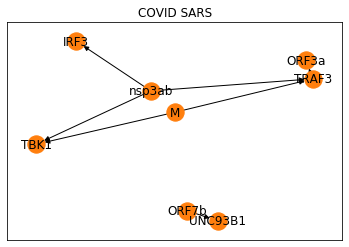

In [20]:
plot_NDEx_zoom_in(source_cov2, target_cov2, 'COVID SARS')

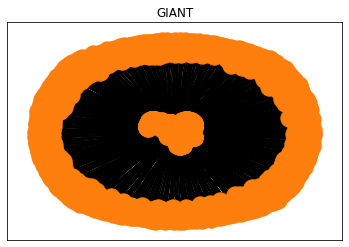

In [22]:
plot_NDEx_zoom_in(source_GIANT, target_GIANT, 'GIANT', False)

## Part 2

In [7]:
#/mnt/research/compbio/krishnanlab/data/MyGeneInfo/20190821_Entrez_Multiple-Species/ID_conversions
#check should be located in the data folder, so change the fp according to your machine
check = pd.read_csv('/mnt/ufs18/home-179/sundarsn/repos/cross_species/src/NDEX/data/MGIalleleQuery_20220425_100225.txt', sep = "\t")
fp_MGI = '/mnt/research/compbio/krishnanlab/data/MyGeneInfo/20190821_Entrez_Multiple-Species/ID_conversions/Mus_musculus_Symbol_to_Entrez_All-Mappings.tsv'


In [8]:
def get_orthologs_entrez(fp, df_gene_list_user):
    f=pd.read_csv(fp,sep='\t', header = None)
    f.columns = ['Symbol', 'Entrez']
    df_sorted = f.sort_values("Symbol")
    df_sorted = df_sorted.reset_index(drop = True)
    gene_list_MGI = []
    for i in check["Allele Symbol"]:
        position = i.find("<")
        if position != -1:
            gene_list_MGI.append(i[0:position])
    entrez = []
    for i in gene_list_MGI:
        ind = df_sorted.index[df_sorted['Symbol']==i]
        ind1 = ind[0]
        entrez.append(df_sorted['Entrez'][ind1])
    return entrez






In [9]:
get_orthologs_entrez(fp_MGI, check)

['319387',
 '12326',
 '12672',
 '12753',
 '76884',
 '76884',
 '13385',
 '13489',
 '13489',
 '13491',
 '13798',
 '14687',
 '26385',
 '26556',
 '26557',
 '16911',
 '66830',
 '18212',
 '18387',
 '18390',
 '18627',
 '19049',
 '19049',
 '243725',
 '217124',
 '20538',
 '13162',
 '216227']